In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
nltk.download('punkt')

nltk.download('omw-1.4')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score
import joblib


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
seed = np.random.seed(2205450)

In [6]:
import os
import io
import pickle

### Mounting google drive

In [7]:
 

GOOGLE_DRIVE = os.path.join('./CE807/Assignment2/',str(2205450)) 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['valid.csv', 'test.csv', 'train.csv', 'models', 'text_asgn2_1 (8).ipynb', 'text_asgn2_1 (10).ipynb', 'train_final25.csv', 'train_final100.csv', 'train_final75.csv', 'valid_processed.csv', 'test_processed.csv', 'train_final50.csv']


Giving directory paths

In [8]:


train_file_path = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') # This is 100% of data
#train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv') #Let's assume that you have train 25% file is saved in train_25.csv. Note that this is a dummy file. You have to create your own file.


print('Train 100% file: ', train_file_path)
#print('Train 25% file: ', train_25_file)

validation_file_path = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', validation_file_path)

test_file_path = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file_path)

Train 100% file:  drive/MyDrive/./CE807/Assignment2/2205450/train.csv
Validation file:  drive/MyDrive/./CE807/Assignment2/2205450/valid.csv
Test file:  drive/MyDrive/./CE807/Assignment2/2205450/test.csv


### Reading the Train, testing and validation files

In [9]:

#train_set = pd.read_csv("/content/drive/MyDrive/text offensive language/train.csv")
#test_set = pd.read_csv("/content/drive/MyDrive/text offensive language/test.csv")
#validation_set = pd.read_csv("/content/drive/MyDrive/text offensive language/valid.csv")


train_set = pd.read_csv(train_file_path)
test_set = pd.read_csv(test_file_path)
validation_set = pd.read_csv(validation_file_path)

In [10]:
train_set

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF
...,...,...,...
12308,92805,And Soros money in their pocket. #maga🇺🇸🇺🇸🇺🇸🇺🇸...,NOT
12309,35989,@USER ur a fucking dumbass fr. there’s no way ...,OFF
12310,30188,.@USER They both want you to believe in yourse...,NOT
12311,96815,@USER It's like a reading a leaflet from Antif...,OFF


### checking for infor and datatypes

In [11]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB


In [12]:

train_set.dtypes

id        int64
tweet    object
label    object
dtype: object

Descriptive features of training set

In [13]:
train_set.describe()   

,id
count,12313.000000
mean,54937.978640
std,26079.349786
min,10006.000000
25%,32275.000000
50%,54953.000000
75%,77777.000000
max,99986.000000


In [14]:
test_set

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [15]:
validation_set

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT
...,...,...,...
922,22519,@USER @USER She is as dumb as she looks,OFF
923,58715,@USER If you cant give me stitches when I get ...,NOT
924,46544,@USER need more ladies to spread out their pus...,OFF
925,70368,@USER I cant believe he didnt work in comet pi...,OFF


## TASK 1 - MODEL SELECTION

### Pre-processing

In [16]:
#removing stopwords:

rmv_stopwords = set(stopwords.words('english'))
rmv_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Defining a function for pre-processing

In [17]:
def pre_process_sets(set):
  
  processed_tweet = []
  train_proc = []
  test_proc = []
  valid_proc = []
  p_tweet = []
 

  #for s in sets:
  #print(s)
  
  for words in range(len(set['tweet'])):
    
    clean_tweets = re.sub(r'([@][A-Z]+)+', '', set['tweet'][words])
    clean_tweets = re.sub('[^a-zA-Z0-9?!,]', ' ',clean_tweets).lower()
   
    clean_tweets1 = re.sub(r'\bbr\b\s+',' ',clean_tweets)
    clean_tweets1 = re.sub(r'[^\w\s\d]', '', clean_tweets1)


    clean_tweets1 = clean_tweets1.split()   #splitting the sentences into words
    clean_tweets1 = [WordNetLemmatizer().lemmatize(words) for words in clean_tweets1 if words not in rmv_stopwords]
    clean_tweets1 = ' '.join(clean_tweets1)
    processed_tweet.append(clean_tweets1)
    data = processed_tweet
    
  return data



calling the function

In [18]:
train = pre_process_sets(train_set) 
test = pre_process_sets(test_set)
valid = pre_process_sets(validation_set)

In [19]:
train

['done well intentional 11th hour attack completely based hearsay want investigation think find said said feinstein admitted sat ready lockstep swamp',
 '6k follower 94k go get goal trumptrain maga kag',
 'tom bought interested tom constituent',
 'even brother think monster url',
 'understand someone know debate willing spend much time trying change mind someone know tryed people gun control get stupid try understand',
 'help help liberal sexual assault fact',
 'know something liberal want talk said canada risk three time house common crossed aisle coming someone background inclineed take warning seriously call old fashioned',
 'march antifa bigot labour anti semitism get right',
 'lmao call courage courageous act tearing apart say quran claiming kind woman majority hindu still get offended act matter msm showing day',
 'liar supporter talking embarrassed last president went world apology tour even bowed like servant url',
 'fighting oppressed puleeeze',
 'go saturday dinner annual clo

In [20]:
len(train)   #100% of train set

12313

In [21]:
type(train)

list

In [22]:
test


['whoisq wherestheserver dumpnike declasfisa democrat support antifa muslim brotherhood ms13 isi pedophilia child trafficking taxpayer funded abortion election fraud sedition treason lockthemallup wwg1wga qanon url',
 'constitutionday revered conservative hated progressive socialist democrat want change',
 'foxnews nra maga potus trump 2ndamendment rnc usmc veteran fakereporting theswamp dnc liberal fakeoutrage first reduces ca url',
 'watching boomer getting news still parole always make smile wentworth finale treasure url',
 'nopasaran unity demo oppose far right london antifa oct13 enough enough url',
 'fuck time',
 'rap form art used express freely gv green light excuse behavior acting like animal street bx violence way living elevate boo get level longevity queen',
 'get feeling kissing behind humiliate later',
 '5 tip enhance audience connection facebook url socialmedia smm url',
 'biggbosstamil janani task going first final list',
 'conservative party low taxation tory tory url'

In [23]:
print("length of test set:", len(test))

length of test set: 860


In [24]:
valid

['trump declassifying information nothing subject investigation fbi doj repeatedly said much go back quackery',
 'ha even trying rig system idea divine intervention god answered president trump',
 'man really thought huh url',
 'm clinton class act response idiot would likely land twitter jail would totally worth hope run office one day',
 'still 753 someone family enraged let loose',
 'great stalk hunter like wife reason animal exist crazy liberal something complain',
 'keep telling lie think liberal believe focusing need yet many million sitting veteran budget intention funding',
 'amazing mom url',
 'name alt right make people think right wing group like antifa fascist blm really black life dont matter',
 'lord pie kept c ck holster shut nobody give toss hollyweirdo say maga',
 'today even wear hood actually proud show face unless course terrorist wing antifa crybaby wing resistance url',
 'dueprocess permitted conservative documented evidence democrat believed doublestandards confi

checking length and type of validation set



In [25]:
print("length of validation set:", len(valid))

length of validation set: 927


In [26]:
type(valid)

list

In [27]:
train_df = pd.DataFrame(train)
train_df

,0
0,done well intentional 11th hour attack complet...
1,6k follower 94k go get goal trumptrain maga kag
2,tom bought interested tom constituent
3,even brother think monster url
4,understand someone know debate willing spend m...
...,...
12308,soros money pocket maga url
12309,ur fucking dumbass fr way anyone else
12310,want believe research discover truth want peop...
12311,like reading leaflet antifa blm utter garbage


In [28]:
train_df.columns =['tweet']  # renaming the column

In [29]:
train_df

,tweet
0,done well intentional 11th hour attack complet...
1,6k follower 94k go get goal trumptrain maga kag
2,tom bought interested tom constituent
3,even brother think monster url
4,understand someone know debate willing spend m...
...,...
12308,soros money pocket maga url
12309,ur fucking dumbass fr way anyone else
12310,want believe research discover truth want peop...
12311,like reading leaflet antifa blm utter garbage


In [30]:
test_df = pd.DataFrame(test)
test_df

,0
0,whoisq wherestheserver dumpnike declasfisa dem...
1,constitutionday revered conservative hated pro...
2,foxnews nra maga potus trump 2ndamendment rnc ...
3,watching boomer getting news still parole alwa...
4,nopasaran unity demo oppose far right london a...
...,...
855,despicabledems lie rifle dem distorted law pus...
856,meetthespeakers present event oiw 2018 finpact...
857,3 people unfollowed talking merlin sorry im st...
858,wednesdaywisdom antifa call right fascist real...


In [31]:
test_df.columns =['tweet']  # renaming the column
test_df

,tweet
0,whoisq wherestheserver dumpnike declasfisa dem...
1,constitutionday revered conservative hated pro...
2,foxnews nra maga potus trump 2ndamendment rnc ...
3,watching boomer getting news still parole alwa...
4,nopasaran unity demo oppose far right london a...
...,...
855,despicabledems lie rifle dem distorted law pus...
856,meetthespeakers present event oiw 2018 finpact...
857,3 people unfollowed talking merlin sorry im st...
858,wednesdaywisdom antifa call right fascist real...


In [32]:
valid_df = pd.DataFrame(valid)
valid_df

,0
0,trump declassifying information nothing subjec...
1,ha even trying rig system idea divine interven...
2,man really thought huh url
3,m clinton class act response idiot would likel...
4,still 753 someone family enraged let loose
...,...
922,dumb look
923,cant give stitch get cut doctor dont give 2 sh...
924,need lady spread pussy cam
925,cant believe didnt work comet pizza alex jones...


In [33]:
valid_df.columns =['tweet']  # renaming the column
valid_df

,tweet
0,trump declassifying information nothing subjec...
1,ha even trying rig system idea divine interven...
2,man really thought huh url
3,m clinton class act response idiot would likel...
4,still 753 someone family enraged let loose
...,...
922,dumb look
923,cant give stitch get cut doctor dont give 2 sh...
924,need lady spread pussy cam
925,cant believe didnt work comet pizza alex jones...


In [34]:
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()
Validation_set_copy = validation_set.copy()

In [35]:
def merge_processed(set1,prepro):
  final_set = set1.drop(set1.columns[[1]], axis=1).to_numpy()   # dropping tweet column 
  final_set = pd.DataFrame(final_set)

  col2 = prepro['tweet']
  final_set.insert(1,2, col2)

  final_set.set_axis(['ID', 'Tweet', 'Label'], axis='columns', inplace=True)  #, inplace=True

  return final_set  #set1,




In [40]:
train_final = merge_processed(train_set_copy,train_df)    #
test_final = merge_processed(test_set_copy,test_df)
valid_final = merge_processed(Validation_set_copy,valid_df) 

<ipython-input-35-5add3d5e5b47>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  final_set.set_axis(['ID', 'Tweet', 'Label'], axis='columns', inplace=True)  #, inplace=True
<ipython-input-35-5add3d5e5b47>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  final_set.set_axis(['ID', 'Tweet', 'Label'], axis='columns', inplace=True)  #, inplace=True
<ipython-input-35-5add3d5e5b47>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  final_set.set_axis(['ID', 'Tweet', 'Label'], axis='columns', inplace=True)  #, inplace=True


In [41]:
train_final

,ID,Tweet,Label
0,42884,done well intentional 11th hour attack complet...,NOT
1,92152,6k follower 94k go get goal trumptrain maga kag,NOT
2,65475,tom bought interested tom constituent,NOT
3,22144,even brother think monster url,OFF
4,81048,understand someone know debate willing spend m...,OFF
...,...,...,...
12308,92805,soros money pocket maga url,NOT
12309,35989,ur fucking dumbass fr way anyone else,OFF
12310,30188,want believe research discover truth want peop...,NOT
12311,96815,like reading leaflet antifa blm utter garbage,OFF


In [42]:
test_final['Label'].value_counts()

NOT    620
OFF    240
Name: Label, dtype: int64

In [44]:
test_final

,ID,Tweet,Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF
1,27014,constitutionday revered conservative hated pro...,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT
3,13876,watching boomer getting news still parole alwa...,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF
...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT


In [46]:
valid_final

,ID,Tweet,Label
0,12476,trump declassifying information nothing subjec...,NOT
1,23242,ha even trying rig system idea divine interven...,NOT
2,97885,man really thought huh url,NOT
3,43414,m clinton class act response idiot would likel...,OFF
4,81403,still 753 someone family enraged let loose,NOT
...,...,...,...
922,22519,dumb look,OFF
923,58715,cant give stitch get cut doctor dont give 2 sh...,NOT
924,46544,need lady spread pussy cam,OFF
925,70368,cant believe didnt work comet pizza alex jones...,OFF


In [47]:
train_model_selection = train_final.copy()

In [48]:
#Splitting the data into training and testing sets:

#X = processed_tweet_train['Tweet']
#Y = processed_tweet_train['Label']

#X_train_25, X_test_25, Y_train_25, Y_test_25 = train_test_split(X,Y,test_size = 0.25, random_state= seed )
#X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X,Y,test_size = 0.50, random_state= seed )
#X_train_75, X_test_75, Y_train_75, Y_test_75 = train_test_split(X,Y,test_size = 0.75, random_state= seed )
#X_train_100, X_test_100, Y_train_100, Y_test_100 = train_test_split(X,Y,test_size = 1, random_state= seed )



X = train_model_selection['Tweet']
Y = train_model_selection['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state= seed )

In [49]:
# Initializing the Vectorizer:

tfidf_vector = TfidfVectorizer() 

tfidf_vect_Xtrain = tfidf_vector.fit_transform(X_train)

tfidf_vect_Xtest = tfidf_vector.transform(X_test)





# TASK 2- Modelling test

In [50]:
random_forest = RandomForestClassifier()

random_forest.fit(tfidf_vect_Xtrain,Y_train)
random_predict_offensive = random_forest.predict(tfidf_vect_Xtest)

print("Accuracy score for Random forest:", accuracy_score(Y_test,random_predict_offensive))
print("classification_report: \n", classification_report(Y_test,random_predict_offensive))

Accuracy score for Random forest: 0.7671321857746022
classification_report: 
               precision    recall  f1-score   support

         NOT       0.76      0.94      0.84      2028
         OFF       0.79      0.44      0.56      1051

    accuracy                           0.77      3079
   macro avg       0.77      0.69      0.70      3079
weighted avg       0.77      0.77      0.75      3079



In [51]:
Svm_classifier = SVC()
Svm_classifier.fit(tfidf_vect_Xtrain,Y_train)

svm_predict_offensive = Svm_classifier.predict(tfidf_vect_Xtest)

print("Accuracy score for SVC with TFIDF:", accuracy_score(Y_test,svm_predict_offensive))
print("classification_report: \n ", classification_report(Y_test,svm_predict_offensive))

Accuracy score for SVC with TFIDF: 0.7564144202663202
classification_report: 
                precision    recall  f1-score   support

         NOT       0.75      0.96      0.84      2028
         OFF       0.82      0.37      0.51      1051

    accuracy                           0.76      3079
   macro avg       0.78      0.66      0.67      3079
weighted avg       0.77      0.76      0.73      3079



## TASK - 3

## Spliting the training set into 4 sets : 25%, 50%, 75%, 100%


In [52]:
#Splitting using iloc:
train_final25 = train_final.iloc[:int(len(train_final)*0.25)]
train_final50 = train_final.iloc[:int(len(train_final)*0.50)]
train_final75 = train_final.iloc[:int(len(train_final)*0.75)]



In [53]:
# Saving these subsets to the drive

train_final25.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final25.csv')
train_final50.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final50.csv')
train_final75.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final75.csv')
train_final.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final100.csv')

# Saving Validation and test files to the drive with processed tweets

valid_final.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/valid_processed.csv')

test_final.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/test_processed.csv')


#train_final25.to_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final25.csv')

In [54]:
#train_f = pd.read_csv('/content/drive/MyDrive/CE807/Assignment2/2205450/train_final25.csv')


In [55]:
train_final25

,ID,Tweet,Label
0,42884,done well intentional 11th hour attack complet...,NOT
1,92152,6k follower 94k go get goal trumptrain maga kag,NOT
2,65475,tom bought interested tom constituent,NOT
3,22144,even brother think monster url,OFF
4,81048,understand someone know debate willing spend m...,OFF
...,...,...,...
3073,61070,bullcrap,NOT
3074,45987,cat special dog,NOT
3075,49149,yes bitch,OFF
3076,62869,fact going vote yes kavanaugh make think know ...,NOT


In [56]:
#train_f = train_f.drop(train_f.columns[[0]], axis=1)
#train_f

#train_set_copy = train_set_copy.drop(train_set_copy.columns[[1]], axis=1).to_numpy()

In [57]:
# vectorization without function

#X_train = train_final25['Tweet']  #.drop("Label", axis=1)
#Y_train = train_final25["Label"]

# Split the validation data into features and labels
#val_f = val_f.drop(val_f.columns[[0]], axis=1)
#X_val = valid_final['Tweet']  #.drop("Label", axis=1)
#y_val = valid_final["Label"]


#tfidf_vector = TfidfVectorizer() 
#tfidf_vect_Xtrain = tfidf_vector.fit_transform(X_train)
#tfidf_vect_Xvalid = tfidf_vector.transform(X_val)
#print(tfidf_vect_Xtrain) 

#val_f = pd.read_csv(valid_file)

In [58]:
#X_train

In [59]:
#print(tfidf_vect_Xtrain)

In [60]:
#print(tfidf_vect_Xvalid)

In [61]:

def Vectorization(xtr,xv,xt):
  tfidf_vector = TfidfVectorizer() 
  tfidf_vect_Xtrain = tfidf_vector.fit_transform(xtr)
  tfidf_vect_Xvalid = tfidf_vector.transform(xv)
  tfidf_vect_Xtest = tfidf_vector.transform(xt)



  
  return tfidf_vect_Xtrain, tfidf_vect_Xvalid, tfidf_vect_Xtest

In [62]:
# Calling vectorization function for train , validation and test sets

vtrain25, vxvalid25, vxtest25 = Vectorization(train_final25['Tweet'],valid_final['Tweet'], test_final['Tweet'])
vtrain50, vxvalid50, vxtest50 = Vectorization(train_final50['Tweet'],valid_final['Tweet'], test_final['Tweet'])
vtrain75, vxvalid75, vxtest75 = Vectorization(train_final75['Tweet'],valid_final['Tweet'], test_final['Tweet'])
vtrain100, vxvalid100, vxtest100 = Vectorization(train_final['Tweet'],valid_final['Tweet'], test_final['Tweet'])



In [63]:
#def vectorizer_save(model_dir):
 # vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
 # pickle.dump(Vectorization, open(vectorizer_file, 'wb'))

In [64]:
#= vectorizer_save()

In [65]:
print(vxtest75)

  (0, 13970)	0.1853192810064321
  (0, 13279)	0.08955222105948264
  (0, 12860)	0.2240363129999006
  (0, 12812)	0.2897368594035705
  (0, 12384)	0.220621659226347
  (0, 12211)	0.16088174920575493
  (0, 11074)	0.2897368594035705
  (0, 10040)	0.18286195061194138
  (0, 9262)	0.2772889829758584
  (0, 8359)	0.20461771817748475
  (0, 8306)	0.2897368594035705
  (0, 7528)	0.24032672804718708
  (0, 6695)	0.24356132124162488
  (0, 5226)	0.227878851619475
  (0, 5127)	0.21099229666180336
  (0, 4206)	0.17806208861330408
  (0, 3477)	0.14460491533132114
  (0, 2372)	0.17356132666333396
  (0, 1906)	0.2772889829758584
  (0, 833)	0.10572080064154007
  (0, 365)	0.21099229666180336
  (1, 13587)	0.24703346000151402
  (1, 11641)	0.3632109595548575
  (1, 9845)	0.39954160520643645
  (1, 5828)	0.45395555766973733
  :	:
  (858, 13674)	0.2642755996150241
  (858, 13562)	0.19645361722558355
  (858, 13133)	0.2642755996150241
  (858, 12965)	0.16513745886091474
  (858, 12763)	0.21434443340345805
  (858, 12599)	0.24808675

In [66]:
Y_train25 = train_final25["Label"]
Y_train50 = train_final50["Label"]
Y_train75 = train_final75["Label"]
Y_train100 = train_final["Label"]

y_val = valid_final["Label"]
y_test = test_final["Label"]

In [67]:
y_test

0      OFF
1      NOT
2      NOT
3      NOT
4      OFF
      ... 
855    OFF
856    NOT
857    OFF
858    NOT
859    NOT
Name: Label, Length: 860, dtype: object

In [68]:
Y_train25.count()

3078

In [69]:
Y_train25.value_counts()


NOT    2035
OFF    1043
Name: Label, dtype: int64

In [70]:
Y_train50.value_counts()

NOT    4141
OFF    2015
Name: Label, dtype: int64

In [71]:
Y_train75.value_counts()

NOT    6176
OFF    3058
Name: Label, dtype: int64

In [72]:
Y_train100.value_counts()

NOT    8221
OFF    4092
Name: Label, dtype: int64

In [73]:
Y_train75.count()

9234

In [74]:
y_val.value_counts()   

NOT    619
OFF    308
Name: Label, dtype: int64

In [75]:
y_test.value_counts()

NOT    620
OFF    240
Name: Label, dtype: int64

## Modelling Final

### Paths to model Directories

In [76]:

random_predict_offensive = []
svm_predict_offensive = []

val_file = '/content/drive/MyDrive/CE807/Assignment2/2205450/valid_processed.csv'
#model_dir = '/content/drive/MyDrive/CE807/Assignment2/2205450/models'

model1_dir25 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/1/25/"
model1_dir50 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/1/50/"
model1_dir75 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/1/75/"
model1_dir100 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/1/100/"

model2_dir25 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25/"  # change the model dir for model 2 using os.path
model2_dir50 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/2/50/"
model2_dir75 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/2/75/"
model2_dir100 = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/2/100/"


#model1_dir = os.path.join(model_dir,'1')
#model1_dir = os.path.join(model_dir,'25')




In [88]:
# Model 1 Function with validation and test sets :

def train_model1(Xtrain_vect, Ytrain, Xval_vect, yvalid, model_dir, vect1):

  #train the train set and validation set using Random forest

  random_forest = RandomForestClassifier()

  random_forest.fit(Xtrain_vect,Ytrain)
  random_predict_offensive = random_forest.predict(Xval_vect)

  acc_score_random = accuracy_score(yvalid,random_predict_offensive)
  classif_report_random = classification_report(yvalid,random_predict_offensive)
  
  # print("Accuracy score for Random forest with bag of words:", accuracy_score(yval,random_predict_offensive))
  # print("classification_report: \n", classification_report(yval,random_predict_offensive))

#Save model
  model_file = os.path.join(model_dir, 'model1.sav')
  pickle.dump(random_forest, open(model_file, 'wb'))

  print('Saved model to ', model_file)

  vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
  pickle.dump(vect1, open(vectorizer_file, 'wb'))

  print('Saved Vectorizer to ', vectorizer_file)
  
  return random_predict_offensive, acc_score_random, classif_report_random


#model_dir_RF = "/content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25"
# save_model1(random_forest, Vectorization, model_dir_RF)


In [93]:
# Model 2 Function with validation and test sets :

def train_model2(Xtrain_vect, Ytrain, Xtest_vect, ytest, model_dir,vect2):

  
  #train the train set and validation set using SVM

  Svm_classifier = SVC()
  Svm_classifier.fit(Xtrain_vect,Ytrain)     

  svm_predict_offensive = Svm_classifier.predict(Xtest_vect)  #put test set original

  acc_score_svm = accuracy_score(ytest,svm_predict_offensive)
  classif_report_svm = classification_report(ytest,svm_predict_offensive)
  # f1score_svm =f1_score(ytest,svm_predict_offensive)

#Saving model 2:
  model_file = os.path.join(model_dir, 'model2.sav')
  pickle.dump(Svm_classifier, open(model_file, 'wb'))

  print('Saved model to ', model_file)

  vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
  pickle.dump(vect2, open(vectorizer_file, 'wb'))

  print('Saved Vectorizer to ', vectorizer_file)
  

  
  return svm_predict_offensive,  acc_score_svm, classif_report_svm
  


In [90]:
#vtrain25  vtrain50  vtrain75 vtrain100

## Model1 function call with validation and test set

In [91]:
#Validation Set
random_predict_offensive25, acc_score_random25, classif_report_random25 =  train_model1(vtrain25, Y_train25, vxvalid25, y_val, model1_dir25,vtrain25)
random_predict_offensive50, acc_score_random50, classif_report_random50 =  train_model1(vtrain50, Y_train50, vxvalid50, y_val, model1_dir50,vtrain50)
random_predict_offensive75, acc_score_random75, classif_report_random75 =  train_model1(vtrain75, Y_train75, vxvalid75, y_val, model1_dir75,vtrain75)
random_predict_offensive100, acc_score_random100, classif_report_random100 =  train_model1(vtrain100, Y_train100, vxvalid100, y_val, model1_dir100, vtrain100)

#Test Set
random_predict_offensive25T, acc_score_random25T, classif_report_random25T =  train_model1(vtrain25, Y_train25, vxtest25, y_test, model1_dir25,vtrain25)
random_predict_offensive50T, acc_score_random50T, classif_report_random50T =  train_model1(vtrain50, Y_train50, vxtest50, y_test, model1_dir50,vtrain50)
random_predict_offensive75T, acc_score_random75T, classif_report_random75T =  train_model1(vtrain75, Y_train75, vxtest75, y_test, model1_dir75,vtrain75)
random_predict_offensive100T, acc_score_random100T, classif_report_random100T =  train_model1(vtrain100, Y_train100, vxtest100, y_test, model1_dir100,vtrain100)



Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/25/model1.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/25/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/50/model1.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/50/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/75/model1.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/75/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/100/model1.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/100/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/25/model1.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1/25/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/1

## Model2 function call with validation and test set

In [94]:
#Validation Set
svm_predict_offensive25,  acc_score_svm25, classif_report_svm25 =  train_model2(vtrain25, Y_train25, vxvalid25, y_val, model2_dir25, vtrain25)
svm_predict_offensive50,  acc_score_svm50, classif_report_svm50 =  train_model2(vtrain50, Y_train50, vxvalid50, y_val, model2_dir50,vtrain50)
svm_predict_offensive75,  acc_score_svm75, classif_report_svm75 =  train_model2(vtrain75, Y_train75, vxvalid75, y_val, model2_dir75,vtrain75)
svm_predict_offensive100,  acc_score_svm100, classif_report_svm100 =  train_model2(vtrain100, Y_train100, vxvalid100, y_val, model2_dir100,vtrain100)

#Test Set
svm_predict_offensive25T,  acc_score_svm25T, classif_report_svm25T =  train_model2(vtrain25, Y_train25, vxtest25, y_test, model2_dir25,vtrain25)
svm_predict_offensive50T,  acc_score_svm50T, classif_report_svm50T =  train_model2(vtrain50, Y_train50, vxtest50, y_test, model2_dir50,vtrain50)
svm_predict_offensive75T,  acc_score_svm75T, classif_report_svm75T =  train_model2(vtrain75, Y_train75, vxtest75, y_test, model2_dir75,vtrain75)
svm_predict_offensive100T,  acc_score_svm100T, classif_report_svm100T =  train_model2(vtrain100, Y_train100, vxtest100, y_test, model2_dir100,vtrain100)


# svm_predict_offensive25T    svm_predict_offensive50T    svm_predict_offensive75T   svm_predict_offensive100T

Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25/model2.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/50/model2.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/50/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/75/model2.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/75/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/100/model2.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/100/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25/model2.sav
Saved Vectorizer to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2/25/vectorizer.sav
Saved model to  /content/drive/MyDrive/CE807/Assignment2/2205450/models/2

# Testing predictions on Validation set with metrics

In [95]:
print("\nAccuracy of Validation set on random 25: ",acc_score_random25)
print("\n Accuracy of Validation set on random 50:",acc_score_random50)
print("\nAccuracy of Validation set on random 75:",acc_score_random75)
print("\nAccuracy of Validation set on random 100:",acc_score_random100)

print("\nClassification report of Validation set on random 25: \n",classif_report_random25)
print("\n Classification report of Validation set on random 50\n:",classif_report_random50)
print("\Classification report of Validation set on random 75:\n",classif_report_random75)
print("\Classification report of Validation set on random 100:\n",classif_report_random100)



print("\nAccuracy of Validation set on svm 25: ",acc_score_svm25)
print("\nAccuracy of Validation set on svm 50: ",acc_score_svm50)
print("\nAccuracy of Validation set on svm 75: ",acc_score_svm75)
print("\n Accuracy of Validation set on svm 100: ",acc_score_svm100)

print("\nClassification report of Validation set on svm 25: \n",classif_report_svm25)
print("\n Classification report of Validation set on svm 50:\n",classif_report_svm50)
print("\Classification report of Validation set on svm 75:\n",classif_report_svm75)
print("\Classification report of Validation set on svm 100\:\n",classif_report_svm100)



Accuracy of Validation set on random 25:  0.7486515641855448

 Accuracy of Validation set on random 50: 0.7691477885652643

Accuracy of Validation set on random 75: 0.7734627831715211

Accuracy of Validation set on random 100: 0.7756202804746494

Classification report of Validation set on random 25: 
               precision    recall  f1-score   support

         NOT       0.75      0.93      0.83       619
         OFF       0.73      0.39      0.51       308

    accuracy                           0.75       927
   macro avg       0.74      0.66      0.67       927
weighted avg       0.74      0.75      0.72       927


 Classification report of Validation set on random 50
:               precision    recall  f1-score   support

         NOT       0.77      0.94      0.84       619
         OFF       0.77      0.44      0.56       308

    accuracy                           0.77       927
   macro avg       0.77      0.69      0.70       927
weighted avg       0.77      0.77      0

# Testing predictions on Test set with metrics

In [96]:
print("\nAccuracy of test set on random 25: ",acc_score_random25T)
print("\n Accuracy of test set on random 50:",acc_score_random50T)   # acc_score_random25T ,acc_score_random50T, acc_score_random75T, acc_score_random100T
print("\nAccuracy of test set on random 75:",acc_score_random75T)
print("\nAccuracy of test set on random 100:",acc_score_random100T)


print("\nClassification report of test set on random 25: \n",classif_report_random25T)
print("\n Classification report of test set on random 50:\n",classif_report_random50T)
print("\Classification report of test set on random 75:\n",classif_report_random75T)
print("\Classification report of test set on random 100\n:",classif_report_random100T)

print("\nAccuracy of test set on svm 25: ",acc_score_svm25T)
print("\nAccuracy of test set on svm 50: ",acc_score_svm50T)  # acc_score_svm25T, acc_score_svm50T,acc_score_svm75T,acc_score_svm100T
print("\nAccuracy of test set on svm 75: ",acc_score_svm75T)
print("\n Accuracy of test set on svm 100: ",acc_score_svm100T)

print("\nClassification report of test set on svm 25: \n",classif_report_svm25T)
print("\n Classification report of test set on svm 50:\n",classif_report_svm50T)
print("\Classification report of test set on svm 75:\n",classif_report_svm75T)
print("\Classification report of test set on svm 100:\n",classif_report_svm100T)



Accuracy of test set on random 25:  0.8046511627906977

 Accuracy of test set on random 50: 0.8151162790697675

Accuracy of test set on random 75: 0.8104651162790698

Accuracy of test set on random 100: 0.8220930232558139

Classification report of test set on random 25: 
               precision    recall  f1-score   support

         NOT       0.80      0.97      0.88       620
         OFF       0.83      0.38      0.52       240

    accuracy                           0.80       860
   macro avg       0.81      0.67      0.70       860
weighted avg       0.81      0.80      0.78       860


 Classification report of test set on random 50:
               precision    recall  f1-score   support

         NOT       0.81      0.97      0.88       620
         OFF       0.86      0.40      0.55       240

    accuracy                           0.82       860
   macro avg       0.83      0.69      0.72       860
weighted avg       0.82      0.82      0.79       860

\Classification repor

In [97]:
#random_predict_offensive25T = pd.Series(random_predict_offensive25T)
#random_predict_offensive25T

## Plots

### Accuracy comparison on Validation set

In [98]:
acc_plot_randomV = [acc_score_random25 ,acc_score_random50, acc_score_random75, acc_score_random100 ]
acc_plot_svmV = [ acc_score_svm25, acc_score_svm50,acc_score_svm75,acc_score_svm100]
Subset = ['25','50','75','100']

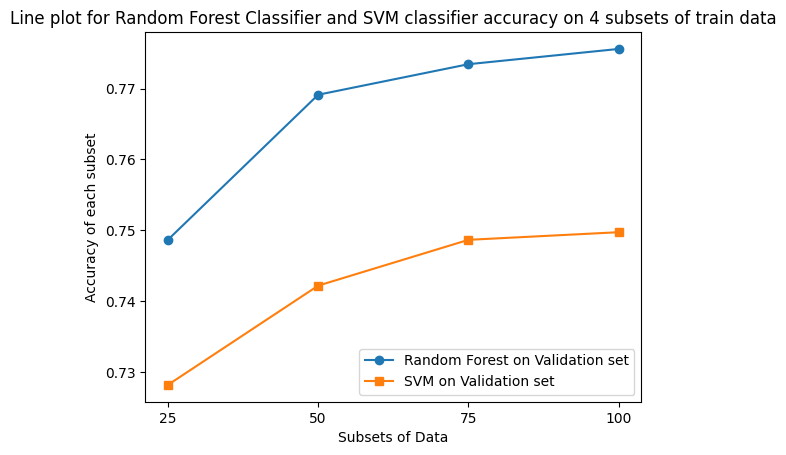

In [99]:


# Plotting the line plots with markers
plt.plot(Subset, acc_plot_randomV, marker='o', label='Random Forest on Validation set')
plt.plot(Subset, acc_plot_svmV, marker='s', label='SVM on Validation set')
plt.legend()
plt.xlabel('Subsets of Data')
plt.ylabel('Accuracy of each subset')

plt.title('Line plot for Random Forest Classifier and SVM classifier accuracy on 4 subsets of train data')

# Showing plot
plt.show()

## Accuracy comparison on test set

In [100]:
acc_plot_random = [acc_score_random25T ,acc_score_random50T, acc_score_random75T, acc_score_random100T ]
acc_plot_svm = [ acc_score_svm25T, acc_score_svm50T,acc_score_svm75T,acc_score_svm100T]
Subset = ['25','50','75','100']

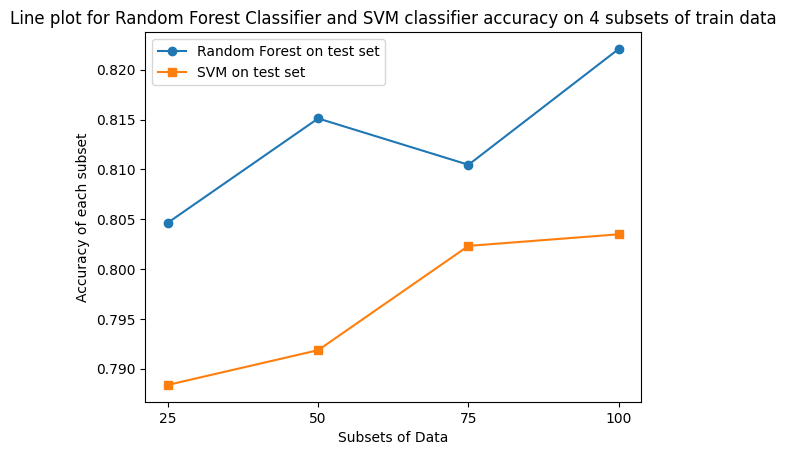

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>


In [116]:


# Plotting the line plots with markers
plt.plot(Subset, acc_plot_random, marker='o', label='Random Forest on test set')
plt.plot(Subset, acc_plot_svm, marker='s', label='SVM on test set')
plt.legend()
plt.xlabel('Subsets of Data')
plt.ylabel('Accuracy of each subset')

plt.title('Line plot for Random Forest Classifier and SVM classifier accuracy on 4 subsets of train data')

# Showing plot
plt.show()

## Saving Predictions of test set  

In [102]:
type(random_predict_offensive25T)

numpy.ndarray

In [103]:
test_final25 = test_final.copy()
test_final50 =test_final.copy()
test_final75 = test_final.copy()
test_final100 = test_final.copy()

test_final25SVM = test_final.copy()   
test_final50SVM =test_final.copy()
test_final75SVM = test_final.copy()
test_final100SVM = test_final.copy()

Predictions on Test data using model 2 Random Forest classifier

In [104]:
test_final25.insert(3,0,random_predict_offensive25T)
test_final50.insert(3,0,random_predict_offensive50T)
test_final75.insert(3,0,random_predict_offensive75T)
test_final100.insert(3,0,random_predict_offensive100T)

test_final25.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final50.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final75.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final100.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)


<ipython-input-104-84178145b147>:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final25.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-104-84178145b147>:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final50.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-104-84178145b147>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final75.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-104-84178145b147>:9: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Us

Predictions on Test data using model 2 SVM

In [105]:
test_final25SVM.insert(3,0,svm_predict_offensive25T)  
test_final50SVM.insert(3,0,svm_predict_offensive50T)
test_final75SVM.insert(3,0,svm_predict_offensive75T)
test_final100SVM.insert(3,0,svm_predict_offensive100T)

test_final25SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final50SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final75SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
test_final100SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)

<ipython-input-105-7293cddc4469>:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final25SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-105-7293cddc4469>:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final50SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-105-7293cddc4469>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test_final75SVM.set_axis(['ID', 'Tweet', 'Label','Out_Label'], axis='columns', inplace=True)
<ipython-input-105-7293cddc4469>:9: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future ve

In [106]:
import os

def save_test_tocsv(output_test, dir_list):
    
    for i,dir_path in enumerate(dir_list):
        os.makedirs(dir_path, exist_ok=True) 
        
        file_path = os.path.join(dir_path, "output_test.csv")
        
        # Saving data to CSV
        output_test[i].to_csv(file_path, index=False)


In [107]:
dir_list = [model1_dir25, model1_dir50, model1_dir75, model1_dir100]
dir_list2 = [model2_dir25, model2_dir50, model2_dir75, model2_dir100]

test_final_list = [test_final25,test_final50,test_final75,test_final100]
test_final_listSVM =[test_final25SVM, test_final50SVM,test_final75SVM, test_final100SVM]

RF= save_test_tocsv(test_final_list, dir_list)
SVM = save_test_tocsv(test_final_listSVM, dir_list2)



In [108]:
test_final100.head(10)

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,OFF
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
5,83681,fuck time,OFF,OFF
6,96874,rap form art used express freely gv green ligh...,NOT,NOT
7,65507,get feeling kissing behind humiliate later,OFF,NOT
8,78910,5 tip enhance audience connection facebook url...,NOT,NOT
9,46363,biggbosstamil janani task going first final list,NOT,NOT


In [109]:
test_final75

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,NOT


In [110]:
test_final50

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,OFF
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,OFF


In [111]:
test_final25

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,OFF


In [112]:
test_final25SVM

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,NOT


In [113]:
test_final50SVM

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,OFF
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,NOT


In [114]:
test_final75SVM

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,NOT
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,NOT


In [115]:
test_final100SVM

,ID,Tweet,Label,Out_Label
0,15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF,NOT
1,27014,constitutionday revered conservative hated pro...,NOT,NOT
2,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT,NOT
3,13876,watching boomer getting news still parole alwa...,NOT,NOT
4,60133,nopasaran unity demo oppose far right london a...,OFF,NOT
...,...,...,...,...
855,73439,despicabledems lie rifle dem distorted law pus...,OFF,NOT
856,25657,meetthespeakers present event oiw 2018 finpact...,NOT,NOT
857,67018,3 people unfollowed talking merlin sorry im st...,OFF,NOT
858,50665,wednesdaywisdom antifa call right fascist real...,NOT,NOT
